In [41]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from nltk import WhitespaceTokenizer
import urllib
from wordcloud import WordCloud

In [42]:
# 데이터 읽기
df = pd.read_csv(r'\Users\project\dataAnalysis-project\JYS\3.EDA\saramin_jobkorea_sjy.csv', index_col=0, encoding='UTF8')
print(df.shape)
df.head(3)

(47645, 10)


,resource,company,duty,career,degree,work_place,work_type,category,link,info
0,jobkorea,디휴브(DEHUV),[디휴브] 개발자 부문채용,무관,그 외,경기,정규직,"['반응형 웹, 백엔드, 풀스택, 하이브리드 앱, 소프트웨어개발, BigData, ...",https://www.jobkorea.co.kr/Recruit/GI_Read/366...,https://www.jobkorea.co.kr/Recruit/Co_Read/C/d...
1,jobkorea,㈜레미유코스메틱,브랜드 디자이너 / MD / (카페)쇼룸 매니저 채용,경력,그 외,서울,정규직,"['화장품, 마케팅, 마케팅기획, 브랜딩, 프로모션, 상품기획, 신상품개발, 온라인...",https://www.jobkorea.co.kr/Recruit/GI_Read/366...,https://www.jobkorea.co.kr/Recruit/Co_Read/C/l...
2,jobkorea,㈜순진,마케팅 담당자 및 상품기획/MD 경력직 채용,경력,고등학교 졸업,서울,정규직,"['영상편집, 포토샵, 제품기획, 광고기획, 마케팅, 마케팅기획, 바이럴마케팅, 브...",https://www.jobkorea.co.kr/Recruit/GI_Read/366...,https://www.jobkorea.co.kr/Recruit/Co_Read/C/s...


그래프 한글깨짐 방지 처리

In [43]:
#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic') #윈도우, 구글 콜랩
#mpl.rc('font', family='AppleGothic') #맥
mpl.rcParams['axes.unicode_minus'] = False

# 1.'career' 컬럼 시각화 표현

In [44]:
df['career'].value_counts()

경력    22791
무관    22741
신입     2113
Name: career, dtype: int64

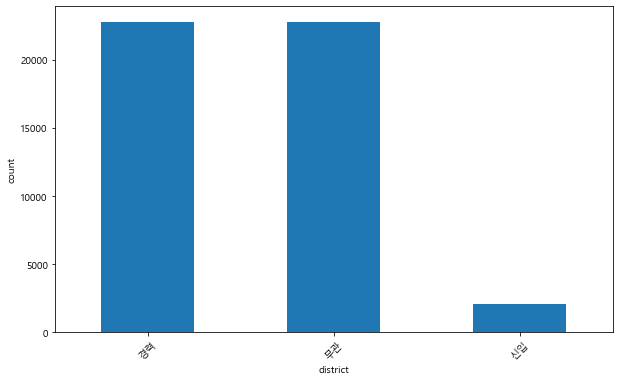

In [45]:
plt.figure(figsize=(10, 6))
df['career'].value_counts().plot(kind="bar")
plt.xlabel('district')
plt.ylabel('count')
plt.xticks(rotation = 45)
plt.show()

결론 : 신입채용이 압도적으로 적다. 경력과 무관은 비등한 수준!

# 2. 'work place' 컬럼 시각화 표현

In [46]:
df['work_place'].value_counts()

서울    30126
경기     9854
부산     1265
인천     1239
대전     1196
대구      813
광주      452
충남      404
경남      391
충북      347
전북      305
경북      291
전남      179
세종      178
제주      173
울산      156
강원      136
해외      118
전국       22
Name: work_place, dtype: int64

In [47]:
df['capital_area'] = df['work_place'].apply(lambda x: "수도권" if x in ["서울","경기"] else "기타" if x in ["해외","전국"]
                                                      else "비수도권")

In [48]:
df['capital_area'].value_counts()

수도권     39980
비수도권     7525
기타        140
Name: capital_area, dtype: int64

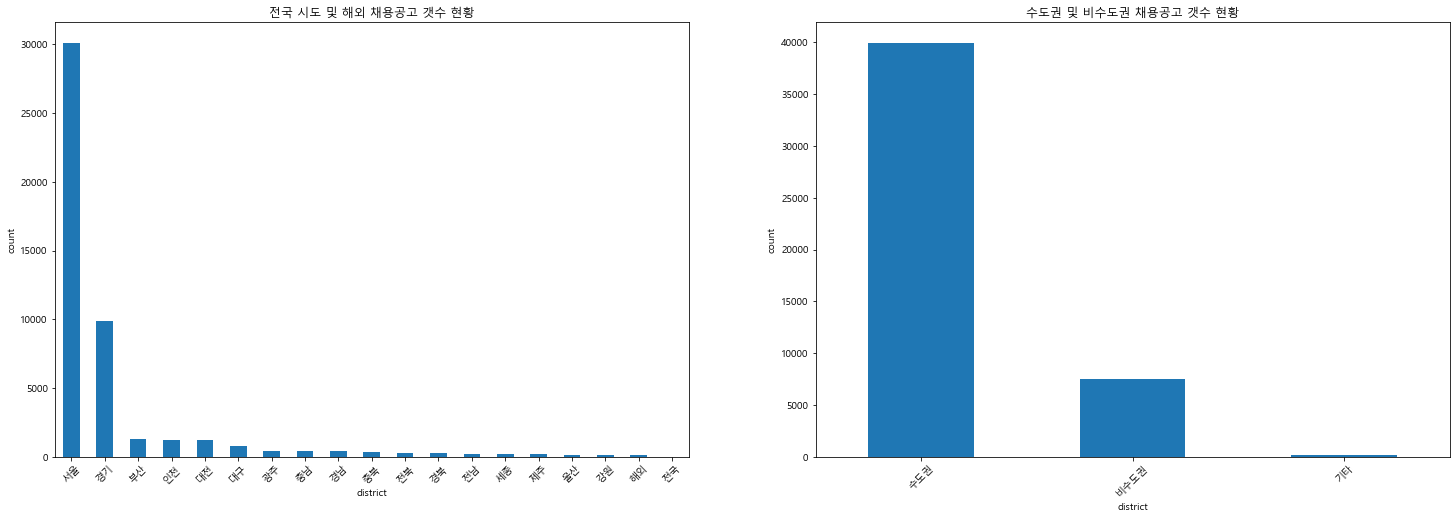

In [49]:
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
df['work_place'].value_counts().plot(kind="bar")
plt.title("전국 시도 및 해외 채용공고 갯수 현황")
plt.xlabel('district')
plt.ylabel('count')
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
plt.title("수도권 및 비수도권 채용공고 갯수 현황")
df['capital_area'].value_counts().plot(kind="bar")
plt.xlabel('district')
plt.ylabel('count')
plt.xticks(rotation = 45)

plt.show()

결론 : 서울이 월등히 채용건수가 많다! 그 다음 경기도 확연히 높다! -> 수도권에 일자리 편중이 심하다.

In [50]:
df.columns

Index(['resource', 'company', 'duty', 'career', 'degree', 'work_place',
       'work_type', 'category', 'link', 'info', 'capital_area'],
      dtype='object')

# 'degree' 컬럼 그래프 시각화

In [51]:
df_degree = pd.DataFrame(df['degree'].value_counts())

In [52]:
df_degree

,degree
그 외,24080
"대학졸업(2,3년)",11604
대학교졸업(4년),8732
고등학교 졸업,2888
대학원 석사졸업,308
대학원 박사졸업,33


In [53]:
df_degree.reset_index(inplace=True)

In [54]:
df_degree.columns = ["degree","count"]

In [55]:
df_degree['degree'] = df_degree['degree'].str.replace("그 외","학력무관 등")

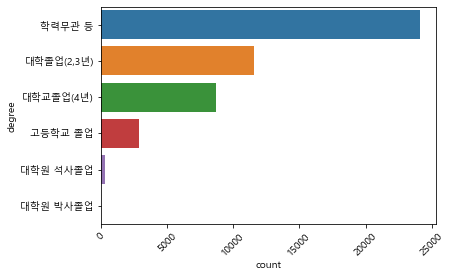

In [56]:
sns.barplot(data=df_degree,y='degree',x='count')
plt.xticks(rotation=45)
plt.show()

In [57]:
df['company']

0           디휴브(DEHUV)
1             ㈜레미유코스메틱
2                  ㈜순진
3             효성에프엠에스㈜
4               ㈜빗썸코리아
             ...      
18368    케이아이디비자금중개(주)
18369            (주)파폼
18370       (주)엔엠에스컨설팅
18371        (주)여의도사람들
18372        인천웨딩 주식회사
Name: company, Length: 47645, dtype: object

In [58]:
df.columns

Index(['resource', 'company', 'duty', 'career', 'degree', 'work_place',
       'work_type', 'category', 'link', 'info', 'capital_area'],
      dtype='object')

In [102]:
len(df['work_type'].value_counts())

44

In [60]:
df['work_type'] = df['work_type'].str.replace(" ","")

In [61]:
df['work_type'] = df['work_type'].str.replace("인턴","인턴직")
df['work_type'] = df['work_type'].str.replace("인턴직직","인턴직")


In [ ]:
df_work_type = pd.DataFrame(df['work_type'].value_counts())
df_work_type

In [65]:
df_work_type.reset_index(inplace=True)
df_work_type

,index,work_type
0,정규직,41628
1,계약직,3250
2,정규직·계약직,1391
3,인턴직,226
4,정규직·병역특례,143
5,프리랜서,143
6,계약직·프리랜서,139
7,정규직·프리랜서,138
8,정규직·인턴직,112
9,계약직·파견직,99


In [92]:
df_work_type[df_work_type['index'].str.contains('·')]

,index,work_type
2,정규직·계약직,1391
4,정규직·병역특례,143
6,계약직·프리랜서,139
7,정규직·프리랜서,138
8,정규직·인턴직,112
9,계약직·파견직,99
12,정규직·파트,37
13,계약직·아르바이트,32
17,계약직·인턴직,22
18,정규직·파견직,19


In [98]:
df_work_type2 = df_work_type[~df_work_type['index'].str.contains("·", na=False, case=False)]

In [100]:
print(df_work_type2.shape)
df_work_type2

(15, 2)


,index,work_type
0,정규직,41628
1,계약직,3250
3,인턴직,226
5,프리랜서,143
10,병역특례,60
11,파견직,40
14,-,32
15,교육생,31
16,아르바이트,25
25,위촉직,3


In [ ]:
df_work_type.drop(index = df_work_type[df_work_type['index'].str.contains('·')])

In [101]:
df_work_type3=  df_work_type[df_work_type['index'].str.contains('·')]
print(df_work_type3.shape)
df_work_type3

(29, 2)


,index,work_type
2,정규직·계약직,1391
4,정규직·병역특례,143
6,계약직·프리랜서,139
7,정규직·프리랜서,138
8,정규직·인턴직,112
9,계약직·파견직,99
12,정규직·파트,37
13,계약직·아르바이트,32
17,계약직·인턴직,22
18,정규직·파견직,19


In [74]:
df_work_type3['index1'] = df_work_type3['index'].apply(lambda x: x.split('·')[0])
df_work_type3['index2'] = df_work_type3['index'].apply(lambda x: x.split('·')[1])
df_work_type3.drop('index',axis=1,inplace=True)
df_work_type3.head()

C:\Users\user\AppData\Local\Temp/ipykernel_13936/2444222677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_work_type3['index1'] = df_work_type3['index'].apply(lambda x: x.split('·')[0])
C:\Users\user\AppData\Local\Temp/ipykernel_13936/2444222677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_work_type3['index2'] = df_work_type3['index'].apply(lambda x: x.split('·')[1])
C:\Users\user\anaconda3\envs\jorldy\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying 

,work_type,index1,index2
2,1391,정규직,계약직
4,143,정규직,병역특례
6,139,계약직,프리랜서
7,138,정규직,프리랜서
8,112,정규직,인턴직


In [80]:
df_work_type3=df_work_type3[['index1','index2','work_type']]
df_work_type3.head()

,index1,index2,work_type
2,정규직,계약직,1391
4,정규직,병역특례,143
6,계약직,프리랜서,139
7,정규직,프리랜서,138
8,정규직,인턴직,112


In [84]:
df_work_type4 = df_work_type3[['index1','work_type']]
df_work_type5 = df_work_type3[['index2','work_type']]
df_work_type5.rename(columns={'index2':'index1'},inplace=True)

C:\Users\user\anaconda3\envs\jorldy\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [105]:
df_work_type6 = pd.concat([df_work_type4,df_work_type5],axis=0)
df_work_type6.rename(columns={"index1":"index"},inplace=True)
df_work_type6

,index,work_type
2,정규직,1391
4,정규직,143
6,계약직,139
7,정규직,138
8,정규직,112
9,계약직,99
12,정규직,37
13,계약직,32
17,계약직,22
18,정규직,19


In [110]:
df_work_type = pd.concat([df_work_type2,df_work_type6],axis=0)
df_work_type.rename(columns={"work_type":"count"},inplace=True)

In [113]:
df_work_type=df_work_type.groupby(by='index').sum()
df_work_type.reset_index(inplace=True)

,index,count
0,-,32
1,계약직,4941
2,교육생,35
3,병역특례,204
4,아르바이트,76
5,연수생/교육생,1
6,위촉직,12
7,인턴직,364
8,전임,12
9,정규직,43505


In [116]:
df_work_type.sort_values(by="count",ascending=False)

,index,count
9,정규직,43505
1,계약직,4941
14,프리랜서,431
7,인턴직,364
3,병역특례,204
12,파견직,161
4,아르바이트,76
13,파트,53
2,교육생,35
0,-,32


In [121]:
df_work_type['index'] = df_work_type['index'].str.replace('연수생/교육생','교육생')
df_work_type['index'] = df_work_type['index'].str.replace('정규직외','정규직')
df_work_type['index'] = df_work_type['index'].str.replace('팀원','정규직')
df_work_type['index'] = df_work_type['index'].str.replace('병역특례','계약직')
df_work_type['index'] = df_work_type['index'].str.replace(' ','')
df_work_type.sort_values(by="count",ascending=False)

,index,count
9,정규직,43505
1,계약직,4941
14,프리랜서,431
7,인턴직,364
3,계약직,204
12,파견직,161
4,아르바이트,76
13,파트,53
2,교육생,35
0,-,32


In [122]:
df_work_type=df_work_type.groupby(by='index').sum()
df_work_type.reset_index(inplace=True)

In [126]:
df_work_type.sort_values(by="count",ascending=False)

,index,count
7,정규직,43507
1,계약직,5145
10,프리랜서,431
5,인턴직,364
8,파견직,161
3,아르바이트,76
9,파트,53
2,교육생,36
0,-,32
11,해외취업,18


In [127]:
df_work_type['index'] = df_work_type['index'].str.replace('아르바이트','기타')
df_work_type['index'] = df_work_type['index'].str.replace('파트','기타')
df_work_type['index'] = df_work_type['index'].str.replace('교육생','기타')
df_work_type['index'] = df_work_type['index'].str.replace('-','기타')
df_work_type['index'] = df_work_type['index'].str.replace('해외취업','기타')
df_work_type['index'] = df_work_type['index'].str.replace('위촉직','기타')
df_work_type['index'] = df_work_type['index'].str.replace('전임','기타')
df_work_type['index'] = df_work_type['index'].str.replace(' ','')

In [133]:
df_work_type

,index,count
0,계약직,5145
1,기타,239
2,인턴직,364
3,정규직,43507
4,파견직,161
5,프리랜서,431


In [ ]:
df_work_type=df_work_type.groupby(by='index').sum()
df_work_type.reset_index(inplace=True)

In [138]:
df_work_type =df_work_type.sort_values(by="count",ascending=False)

In [139]:
df_work_type

,index,count
0,정규직,43507
1,계약직,5145
2,프리랜서,431
3,인턴직,364
4,기타,239
5,파견직,161


In [141]:
df_work_type = df_work_type.reindex(index=[0,1,2,3,5,4])

In [146]:
df_work_type.drop('level_0',axis=1,inplace=True)
df_work_type

,index,count
0,정규직,43507
1,계약직,5145
2,프리랜서,431
3,인턴직,364
4,파견직,161
5,기타,239


In [147]:
df_work_type.columns=['work_type','count']
df_work_type

,work_type,count
0,정규직,43507
1,계약직,5145
2,프리랜서,431
3,인턴직,364
4,파견직,161
5,기타,239


<AxesSubplot:xlabel='work_type', ylabel='count'>

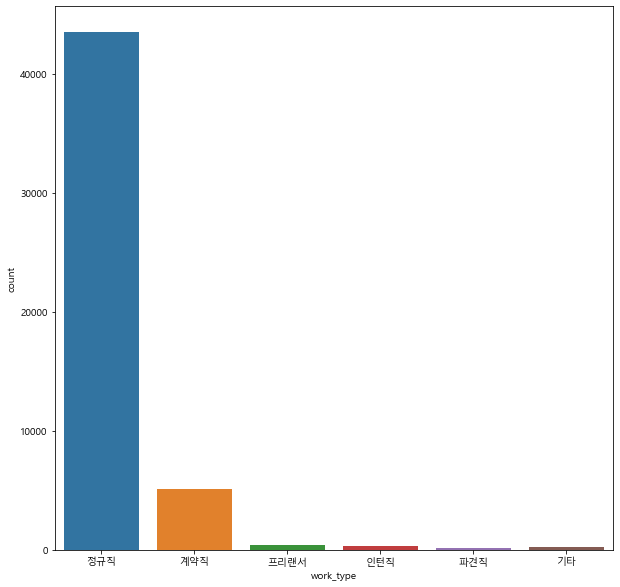

In [154]:
plt.figure(figsize=(10,10))
sns.barplot(data=df_work_type,x='work_type',y="count")

In [155]:
df_work_type.to_csv('work_type.csv')